# Face Mask Detector

## Part 1: Data Collection

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastai.vision.widgets import *
!pip install voila
!jupyter serverextension enable voila —sys-prefix

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

voila 0.2.4 requires nbconvert<7,>=6.0.0, but you'll have nbconvert 5.6.1 which is incompatible.
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.0.18 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
En

In [77]:
mask_urls = pd.read_csv('/notebooks/mask_urls.csv')
mask_urls = mask_urls.drop(mask_urls.columns[0], axis = 1)
mask_urls

,mask_urls
0,https://scontent-sjc3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/120203870_831794794229175_1757627339194677688_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com&_nc_cat=103&_nc_ohc=7QjsTuByqbMAX8xt-W1&_nc_tp=24&oh=e0790673e4e75f7018f09ca3bae1738e&oe=5FC2D6A6
1,https://scontent-sjc3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.180.1440.1440a/s640x640/121435391_781133442669000_4987287414687461043_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com&_nc_cat=100&_nc_ohc=SsQX94FWPnYAX80esyC&oh=81d91c6f91799b093556e322f334b57e&oe=5FC1F658
2,https://scontent-sjc3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/120511572_791862838244184_4401229616981275079_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com&_nc_cat=100&_nc_ohc=p9YaPcnOYjsAX8bncjq&_nc_tp=24&oh=90b814fc279b4a93265ef17d077d7265&oe=5FC3A680
3,https://scontent-sjc3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.90.720.720a/s640x640/120502642_340261470754610_2325223324082608486_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com&_nc_cat=102&_nc_ohc=-H6q7Xh0hp4AX9v8Ngw&oh=5a4a38fa025eef2c3a06878d8146d7ad&oe=5F9C963D
4,https://scontent-sjc3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/121724616_662061721369726_5479368886766971259_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com&_nc_cat=110&_nc_ohc=ndZipbiFctYAX_S5_MT&_nc_tp=24&oh=4ffa91580295b00a8240e25f4b348dbb&oe=5FC33D09
...,...
3333,https://scontent-sjc3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.180.1440.1440a/s640x640/121270431_256719629100851_8437865789390840414_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com&_nc_cat=111&_nc_ohc=olWRCH_NmW8AX9ISxlR&oh=fe45fb43c11d62e391c0151c4bd38d11&oe=5FC1B284
3334,https://scontent-sjc3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/122071423_2863068710603023_5061312701332433823_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com&_nc_cat=107&_nc_ohc=Q5L7zTlpTdUAX_ADHtH&_nc_tp=24&oh=48827cec2355c554d2d03294f0cacffb&oe=5FC47910
3335,https://scontent-sjc3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/122199165_770988853463707_329415312469291616_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com&_nc_cat=107&_nc_ohc=rVSeSj5N4qIAX9NrRBf&_nc_tp=24&oh=994979fe15139973ad8a055df08c90b3&oe=5F9C2B83
3336,https://scontent-sjc3-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.180.1440.1440a/s640x640/122427228_187130502994215_4204158403551024904_n.jpg?_nc_ht=scontent-sjc3-1.cdninstagram.com&_nc_cat=103&_nc_ohc=xnjfET15XdoAX_5H4HY&oh=b61adfa07f41b5570cd9f8944bb05be3&oe=5FC28B4F


In [9]:
nomask_urls = pd.read_csv('/notebooks/noMask_urls.csv')
nomask_urls = nomask_urls.drop(nomask_urls.columns[0], axis = 1)
nomask_urls

,mask_urls
0,https://scontent-sjc3-1.cdninstagram.com/v/t51...
1,https://scontent-sjc3-1.cdninstagram.com/v/t51...
2,https://scontent-sjc3-1.cdninstagram.com/v/t51...
3,https://scontent-sjc3-1.cdninstagram.com/v/t51...
4,https://scontent-sjc3-1.cdninstagram.com/v/t51...
...,...
1303,https://scontent-sjc3-1.cdninstagram.com/v/t51...
1304,https://scontent-sjc3-1.cdninstagram.com/v/t51...
1305,https://scontent-sjc3-1.cdninstagram.com/v/t51...
1306,https://scontent-sjc3-1.cdninstagram.com/v/t51...


In [58]:
path = Path('mask')
path.mkdir()

for i in range(len(mask_urls)):
    fname = Path("/notebooks/mask/mask" + str(i) + ".jpg")
    download_url(mask_urls.iloc[i][0], fname)    

MissingSchema: Invalid URL 'nan': No schema supplied. Perhaps you meant http://nan?

In [59]:
path = Path('noMask')
path.mkdir()

for i in range(len(mask_urls)):
    fname = Path("/notebooks/noMask/noMask" + str(i) + ".jpg")
    download_url(nomask_urls.iloc[i][0], fname)    

IndexError: single positional indexer is out-of-bounds

## Part 2: Model Training

In [14]:
path = Path('./images')

In [19]:
selfies = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.3, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128))

In [20]:
dls = selfies.dataloaders(path)

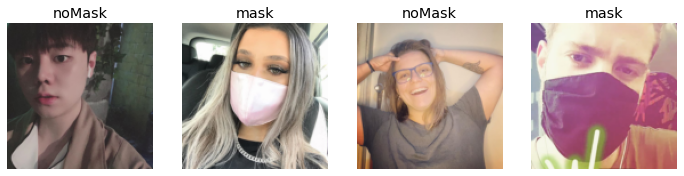

In [17]:
dls.valid.show_batch(max_n = 4, nrows = 1)

In [25]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.226540,0.314061,0.111111,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.487100,0.248981,0.081481,00:02
1,0.343760,0.195389,0.059259,00:02
2,0.249984,0.211387,0.044444,00:02
3,0.184012,0.187467,0.037037,00:02
4,0.145537,0.170716,0.044444,00:02


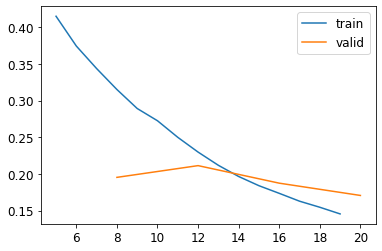

In [26]:
learn.recorder.plot_loss()

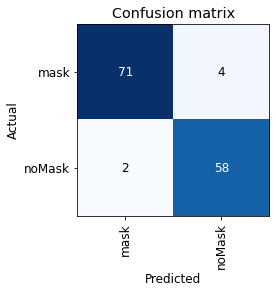

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

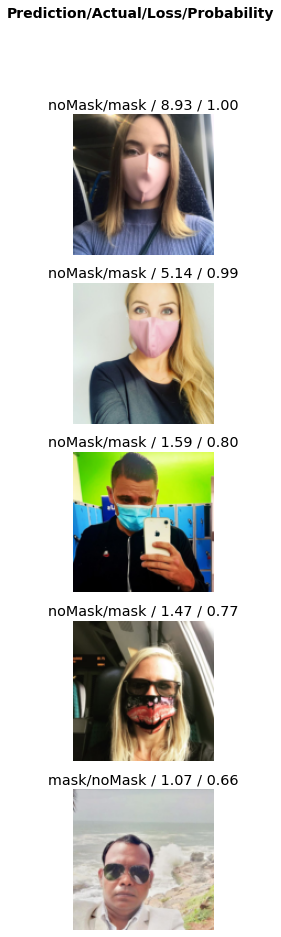

In [28]:
interp.plot_top_losses(5, nrows = 5)

In [29]:
learn.export()

In [30]:
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [31]:
learn_inf = load_learner(path/'export.pkl')

In [41]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

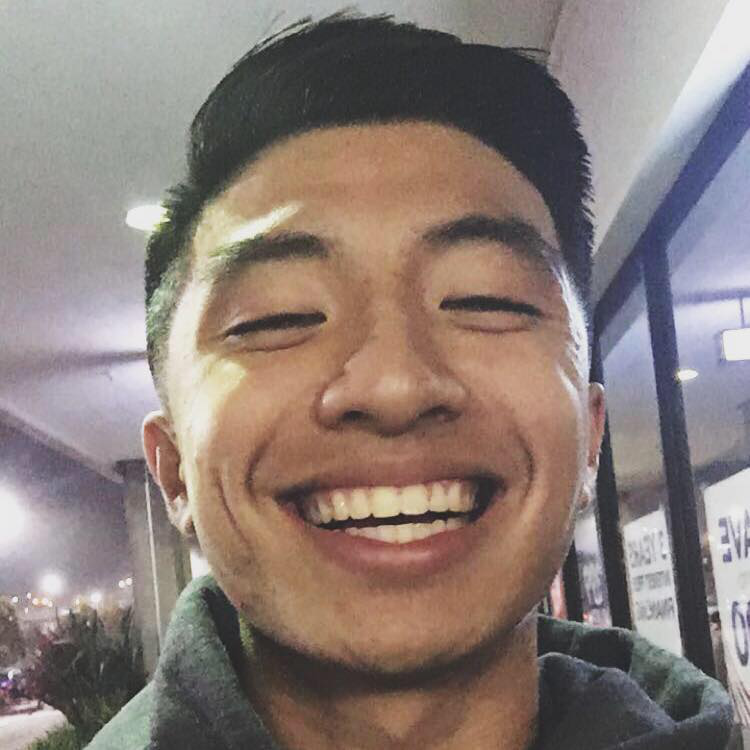

In [43]:
img = PILImage.create(btn_upload.data[-1])
img

In [44]:
out_pl = widgets.Output()
out_pl.clear_output()
out_pl

Output()

In [45]:
with out_pl: display(img.to_thumb(128,128))

In [46]:
lbl_pred = widgets.Label()
lbl_pred.value = 'Please choose an image'
lbl_pred

Label(value='Please choose an image')

In [47]:
btn_run = widgets.Button(description = 'Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [48]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [49]:
VBox([widgets.Label('Select your selfie!'), btn_upload, btn_run, out_pl, lbl_pred])